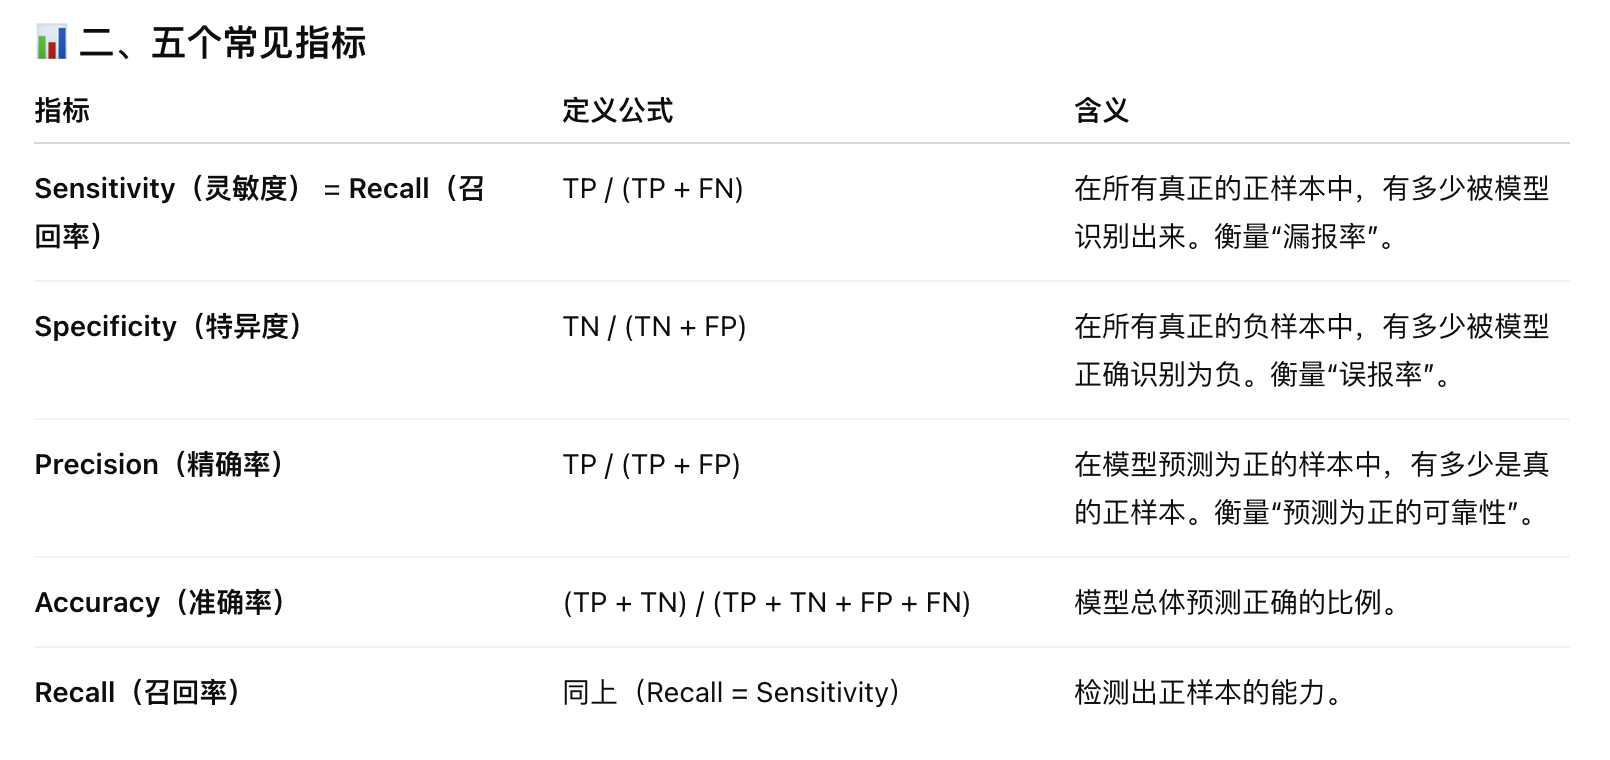


Model accuracy： 0.8016910069177555

Classification report：
               precision    recall  f1-score   support

           0       0.82      0.96      0.89      1043
           1       0.50      0.16      0.25       258

    accuracy                           0.80      1301
   macro avg       0.66      0.56      0.57      1301
weighted avg       0.76      0.80      0.76      1301

KNN Results
Accuracy     : 0.802
Precision    : 0.500
Recall/Sensitivity : 0.163
Specificity  : 0.960


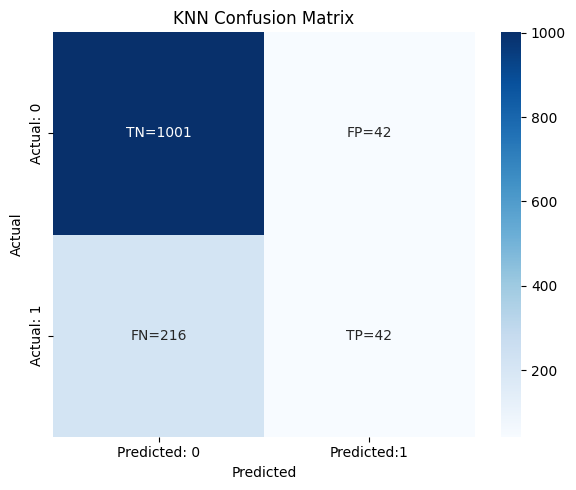

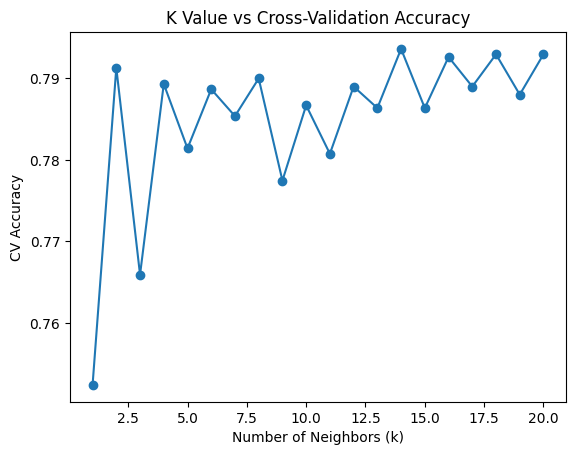

Best K value: 14, average accuracy: 0.7936


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("customer_level.csv")

# 对非数值列进行编码（例如 Country）
if df['Country'].dtype == 'object':
    le = LabelEncoder()
    df['Country'] = le.fit_transform(df['Country'])

X = df[['Frequency', 'Monetary', 'AvgQuantity', 'AvgOrderValue', 'Country']]
y = df['Churn']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)


print("\nModel accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = TN / (TN + FP)

print("KNN Results")
print(f"Accuracy     : {accuracy:.3f}")
print(f"Precision    : {precision:.3f}")
print(f"Recall/Sensitivity : {recall:.3f}")
print(f"Specificity  : {specificity:.3f}")

labels = np.array([[f"TN={TN}", f"FP={FP}"],
                   [f"FN={FN}", f"TP={TP}"]])

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',
            xticklabels=["Predicted: 0", "Predicted:1"],
            yticklabels=["Actual: 0", "Actual: 1"])

plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig("KNN_confusion_matrix.png", dpi=300)
plt.show()

# Hyper parameter tuning
from sklearn.model_selection import cross_val_score

k_values = range(1, 21)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_scaled, y_train, cv=5).mean()
    scores.append(score)

plt.plot(k_values, scores, marker='o')
plt.title('K Value vs Cross-Validation Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('CV Accuracy')
plt.savefig("K value optimization.png", dpi=300)
plt.show()

best_k = k_values[np.argmax(scores)]
print(f"Best K value: {best_k}, average accuracy: {max(scores):.4f}")


Logistic Regression Results
Accuracy     : 0.626
Precision    : 0.340
Recall/Sensitivity : 0.927
Specificity  : 0.551


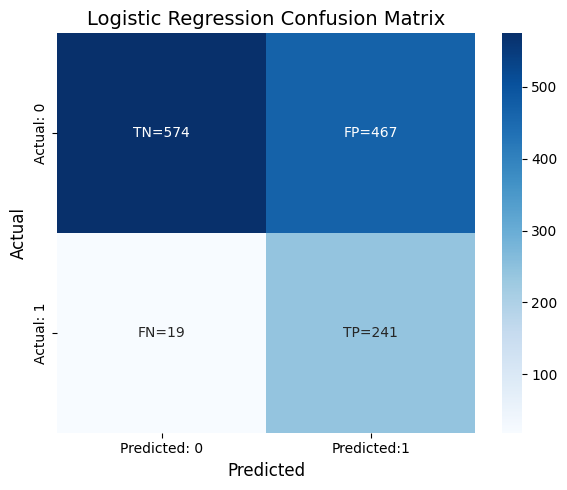

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("customer_level.csv")

X = df[["Frequency", "Monetary", "AvgQuantity", "AvgOrderValue"]]
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = TN / (TN + FP)

print("Logistic Regression Results")
print(f"Accuracy     : {accuracy:.3f}")
print(f"Precision    : {precision:.3f}")
print(f"Recall/Sensitivity : {recall:.3f}")
print(f"Specificity  : {specificity:.3f}")

labels = np.array([[f"TN={TN}", f"FP={FP}"],
                   [f"FN={FN}", f"TP={TP}"]])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=labels, fmt="", cmap="Blues",
            xticklabels=["Predicted: 0", "Predicted:1"],
            yticklabels=["Actual: 0", "Actual: 1"])
plt.title("Logistic Regression Confusion Matrix", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.tight_layout()

plt.savefig("logistic_confusion_matrix2.png", dpi=300)
plt.show()


Decision Tree Results
Accuracy     : 0.743
Precision    : 0.357
Recall/Sensitivity : 0.368
Specificity  : 0.836


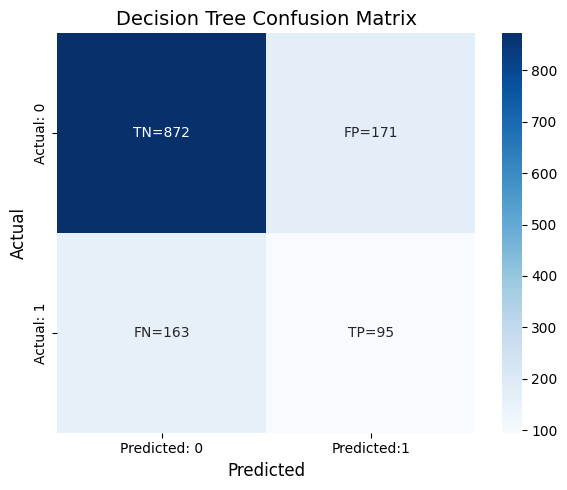

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("customer_level.csv")

X = df[["Frequency", "Monetary", "AvgQuantity", "AvgOrderValue"]]
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = TN / (TN + FP)

print("Decision Tree Results")
print(f"Accuracy     : {accuracy:.3f}")
print(f"Precision    : {precision:.3f}")
print(f"Recall/Sensitivity : {recall:.3f}")
print(f"Specificity  : {specificity:.3f}")


labels = np.array([[f"TN={TN}", f"FP={FP}"],
                   [f"FN={FN}", f"TP={TP}"]])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=labels, fmt="", cmap="Blues",
            xticklabels=["Predicted: 0", "Predicted:1"],
            yticklabels=["Actual: 0", "Actual: 1"])

plt.title("Decision Tree Confusion Matrix", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.tight_layout()
plt.savefig("decision_tree_confusion_matrix.png", dpi=300)
plt.show()


Naive Bayes Results
Accuracy     : 0.370
Precision    : 0.236
Recall/Sensitivity : 0.973
Specificity  : 0.221

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.22      0.36      1043
           1       0.24      0.97      0.38       258

    accuracy                           0.37      1301
   macro avg       0.60      0.60      0.37      1301
weighted avg       0.82      0.37      0.36      1301



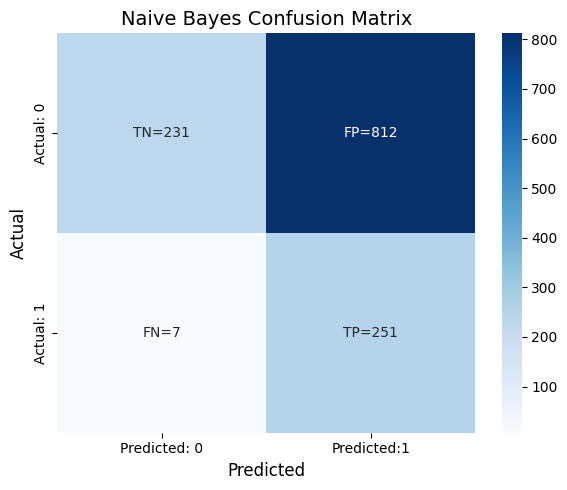

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

df = pd.read_csv("customer_level.csv")

X = df[["Frequency", "Monetary", "AvgQuantity", "AvgOrderValue"]]
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

print("Naive Bayes Results")
print(f"Accuracy     : {accuracy:.3f}")
print(f"Precision    : {precision:.3f}")
print(f"Recall/Sensitivity : {recall:.3f}")
print(f"Specificity  : {specificity:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

labels = np.array([[f"TN={tn}", f"FP={fp}"],
                   [f"FN={fn}", f"TP={tp}"]])

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',
            xticklabels=["Predicted: 0", "Predicted:1"],
            yticklabels=["Actual: 0", "Actual: 1"])
plt.title('Naive Bayes Confusion Matrix', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)

plt.tight_layout()
plt.savefig("naive_bayes_confusion_matrix.png", dpi=300)
plt.show()


Support Vector Machine Results
Accuracy     : 0.636
Precision    : 0.343
Recall/Sensitivity : 0.907
Specificity  : 0.570

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.57      0.72      1043
           1       0.34      0.91      0.50       258

    accuracy                           0.64      1301
   macro avg       0.65      0.74      0.61      1301
weighted avg       0.84      0.64      0.67      1301



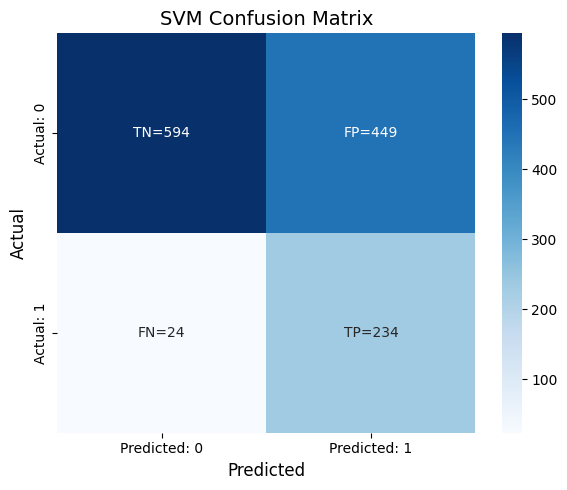

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("customer_level.csv")

X = df[["Frequency", "Monetary", "AvgQuantity", "AvgOrderValue"]]
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred)
specificity = TN / (TN + FP)

print("Support Vector Machine Results")
print(f"Accuracy     : {accuracy:.3f}")
print(f"Precision    : {precision:.3f}")
print(f"Recall/Sensitivity : {recall:.3f}")
print(f"Specificity  : {specificity:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

labels = np.array([[f"TN={TN}", f"FP={FP}"],
                   [f"FN={FN}", f"TP={TP}"]])

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',
            xticklabels=["Predicted: 0", "Predicted: 1"],
            yticklabels=["Actual: 0", "Actual: 1"])

plt.title("SVM Confusion Matrix", fontsize=14)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.tight_layout()
plt.savefig("svm_confusion_matrix.png", dpi=300)
plt.show()


| Performance Indicator | KNN | Logistic Regression | Decision Tree | Naive Bayes | SVM | SAP Prediction |
|------|-----|----------------------|----------------|--------------|-----| ----------------|
| Accuracy | 0.802 | 0.626 | 0.743 | 0.370 | 0.636 | 0.788 |
| Precision | 0.500 | 0.340 | 0.357 | 0.236 | 0.343 | 0.439 |
| Recall / Sensitivity | 0.163 | 0.927 | 0.368 | 0.973 | 0.907 | 0.439 |
| Specificity | 0.960 | 0.551 | 0.836 | 0.221 | 0.570 | 0.870 |
